In [1]:
# set up
dim = 2

import os
import sys
import ot 
import torch 
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from util.functions import *
#from mmd_functions import maximum_mean_discrepancy

import sys

asset_path = "assets_5/"

In [2]:
plt.rcParams.update({
    "axes.labelsize" : 20,
    "xtick.labelsize" : 16,
    "ytick.labelsize" : 16,
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["times"],
    'text.latex.preamble' : r'\usepackage{{amsmath}}'
})

In [3]:
def read_posterior_samples(path):
    return np.loadtxt(path, delimiter=",")


def calc_emd(ref_data_set, data_set, p = 2):
    
    # from https://pythonot.github.io/quickstart.html#optimal-transport-and-wasserstein-distance
    
    n = ref_data_set.shape[0]
    a, b = np.ones((n,)) / n, np.ones((n,)) / n
    
    if p == 2:
        
        M = ot.dist(ref_data_set, data_set)
    
        return np.sqrt(ot.emd2(a, b, M))
    
    elif p == 1:
        
        M = ot.dist(ref_data_set, data_set, metric='euclidean')
    
        return ot.emd2(a, b, M)

    
def read_res_file(path):
    f =  open(path, 'r')
    data =  f.readlines()
    f.close 
    return list(map(float,data))

In [4]:
seed_max = 10
nbr_rounds = 10
seed_data = 10

## Read results 

In [5]:
snl_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    if i != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
        p = asset_path + 'snl_' + id_job + '.txt'
        snl_res[:,i] = read_res_file(p)

In [6]:
snpe_c_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = asset_path + 'snpec_' + id_job + '.txt'
    snpe_c_res[:,i] = read_res_file(p)

In [7]:
snre_b_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = asset_path + 'snre_b_' + id_job + '.txt'
    snre_b_res[:,i] = read_res_file(p)

In [8]:
snpla_res = np.zeros((2,seed_max))

for i in range(seed_max):
    id_job = str(dim) + '_' + str(i+1) + '_' + str(seed_data)
    p = asset_path + 'snpla_' + id_job + '.txt'
    snpla_res[:,i] = read_res_file(p)

Runtime (training) (sec)

In [9]:
print("SNL: " + str(np.median(snl_res[0,:]).round(3)))
print("SNPE-C: " + str(np.median(snpe_c_res[0,:]).round(3)))
print("SNPLA: " + str(np.median(snpla_res[0,:]).round(3)))
print("SNRE-B: " + str(np.median(snre_b_res[0,:]).round(3)))

SNL: 1276.926
SNPE-C: 409.757
SNPLA: 821.071
SNRE-B: 376.638


Runtime (inference, i.e. gen. 1000 samples from the res. posterior) (sec)

In [10]:
print("SNL: " + str(np.median(snl_res[1,:]).round(3)))
print("SNPE-C: " + str(np.median(snpe_c_res[1,:]).round(3)))
print("SNRE-B: " + str(np.median(snre_b_res[1,:]).round(3)))
print("SNPLA: " + str(np.median(snpla_res[1,:]).round(3)))


SNL: 119.511
SNPE-C: 0.009
SNRE-B: 29.458
SNPLA: 0.016


### Load posterior samples 

In [11]:
p = asset_path + 'true_posterior.csv'
analytical_post = read_posterior_samples(p)

In [12]:
snl_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snl_post_round_i = []
    for j in range(seed_max):
        if j != 27: # importantly case seed = 28 files (due to time limit problems on lunarc)
            id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
            p = asset_path + 'snl_posterior_' + str(i+1) + "_"+ id_job + '.csv'
            snl_post_round_i.append(read_posterior_samples(p))
            
    snl_post.append(snl_post_round_i)
        

In [13]:
snpe_c_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snpe_c_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = asset_path + 'post_samples_snpec_' + str(i+1) + "_"+ id_job + '.csv'
        snpe_c_post_round_i.append(read_posterior_samples(p))
            
    snpe_c_post.append(snpe_c_post_round_i)

In [14]:
snre_b_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(nbr_rounds):
    snre_b_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = asset_path + 'post_samples_snre_b_' + str(i+1) + "_"+ id_job + '.csv'
        snre_b_post_round_i.append(read_posterior_samples(p))
            
    snre_b_post.append(snre_b_post_round_i)

In [15]:
snpla_post = [] # posteriors are stored in snl_post[round][seed]

for i in range(10):
    snpla_post_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = asset_path + 'snpla_posterior_' + str(i+1) + "_" + id_job + '.csv'
        snpla_post_round_i.append(read_posterior_samples(p))
            
    snpla_post.append(snpla_post_round_i)

In [16]:
from collections import defaultdict 

bayesflow_samples = defaultdict(dict)
bayesflow_samples["post_samples"] = defaultdict(dict)
bayesflow_samples["lik_samples"] = defaultdict(dict)


for n_samples in ["2000", "6000", "10000"]:
    for repetition_idx in range(1, seed_max+1):
        filename = (f"{asset_path}bf_samples_{n_samples}_{repetition_idx}.pkl")
        with open(filename, "rb") as f:
            file_content = pickle.load(f)
            bayesflow_samples["post_samples"][n_samples][repetition_idx] = file_content["post_samples"]
            bayesflow_samples["lik_samples"][n_samples][repetition_idx] = file_content["lik_samples"]
            
bayesflow_samples = dict(bayesflow_samples)
bayesflow_samples["post_samples"] = dict(bayesflow_samples["post_samples"])
bayesflow_samples["lik_samples"] = dict(bayesflow_samples["lik_samples"])

In [17]:
for n_samples in bayesflow_samples["post_samples"].keys():
    for i in range(1, len(bayesflow_samples["post_samples"][n_samples]) + 1):
        within_prior_idx = np.where((abs(bayesflow_samples["post_samples"][n_samples][i][:, 0]) < 2) & (abs(bayesflow_samples["post_samples"][n_samples][i][:, 1]) < 2))
        bayesflow_samples["post_samples"][n_samples][i] = bayesflow_samples["post_samples"][n_samples][i][within_prior_idx]
        bayesflow_samples["post_samples"][n_samples][i] = bayesflow_samples["post_samples"][n_samples][i][:1000, :]
        
        bayesflow_samples["lik_samples"][n_samples][i] = bayesflow_samples["lik_samples"][n_samples][i][within_prior_idx]
        bayesflow_samples["lik_samples"][n_samples][i] = bayesflow_samples["lik_samples"][n_samples][i][:1000, :]

In [18]:
abc_smc_samples = defaultdict(dict)
abc_smc_samples["post_samples"] = defaultdict(dict)

for n_samples in ["2000", "6000", "10000"]:
    for repetition_idx in range(1, seed_max+1):
        filename = f"{asset_path}postABCdraws_hybrid_attempt{repetition_idx}_{n_samples}.dat"
        samples = pd.read_csv(filename, delimiter="\t", header=None).transpose().to_numpy()
        abc_smc_samples["post_samples"][n_samples][repetition_idx] = samples

abc_smc_samples = dict(abc_smc_samples)
abc_smc_samples["post_samples"] = dict(abc_smc_samples["post_samples"])

In [19]:
abc_smc_samples["post_samples"]["2000"][1].shape

(1000, 2)

### Load post pred samples

In [20]:
p = f'{asset_path}true_post_pred.csv'
analytical_post_pred = read_posterior_samples(p)

In [21]:
snl_post_pred = [] # posterior rped samples are stored in snpla_post_pred[round][seed]

for i in range(10):
    snl_post_pred_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = asset_path + 'snl_post_pred_' + str(i+1) + "_" + id_job + '.csv'
        snl_post_pred_round_i.append(read_posterior_samples(p))
            
    snl_post_pred.append(snl_post_pred_round_i)

In [22]:
snpla_post_pred = [] # posterior rped samples are stored in snpla_post_pred[round][seed]

for i in range(10):
    snpla_post_pred_round_i = []
    for j in range(seed_max):
        id_job = str(dim) + '_' + str(j+1) + '_' + str(seed_data)
        p = asset_path + 'snpla_post_pred_' + str(i+1) + "_" + id_job + '.csv'
        snpla_post_pred_round_i.append(read_posterior_samples(p))
            
    snpla_post_pred.append(snpla_post_pred_round_i)

### Plotting - posterior

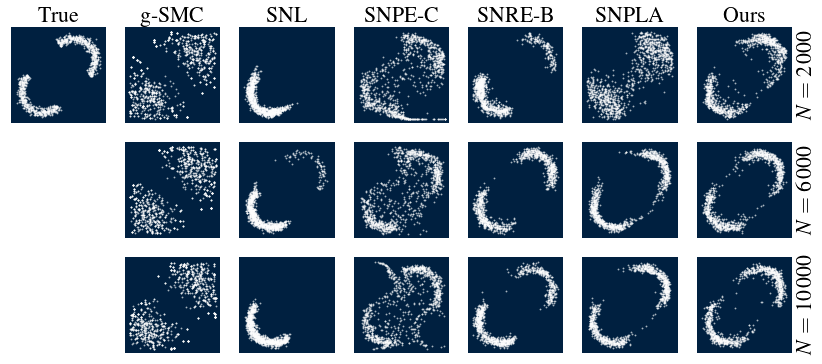

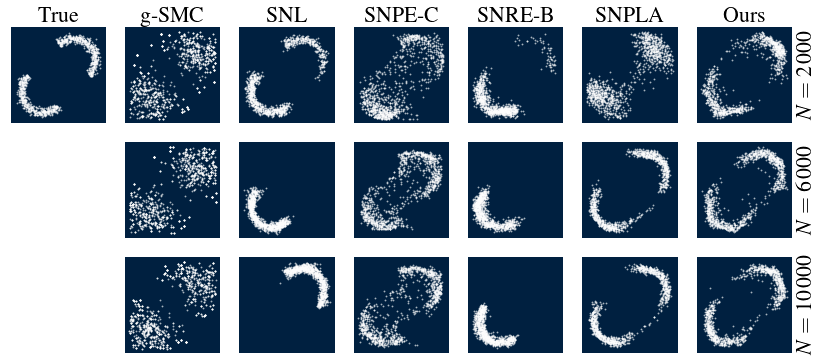

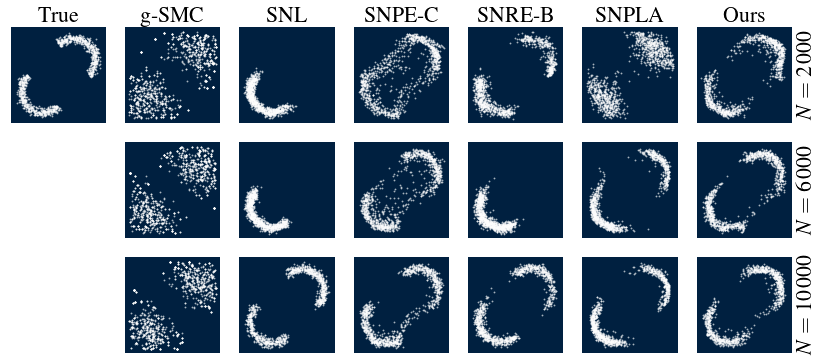

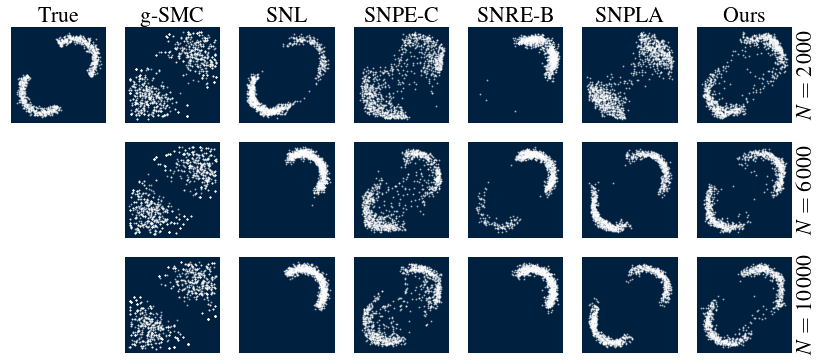

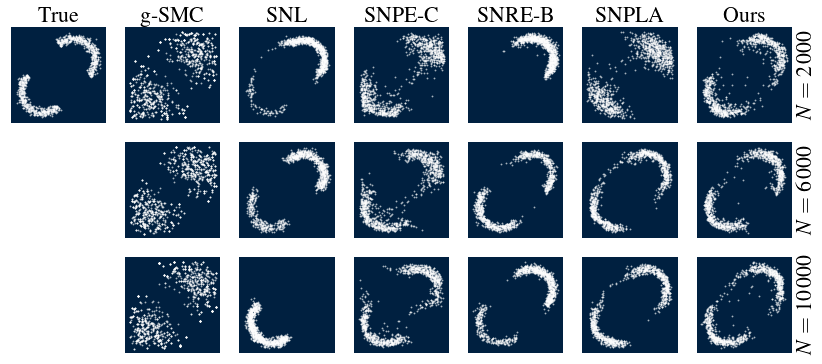

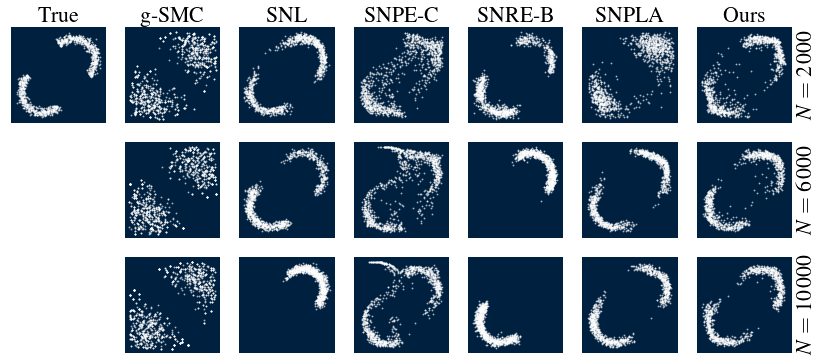

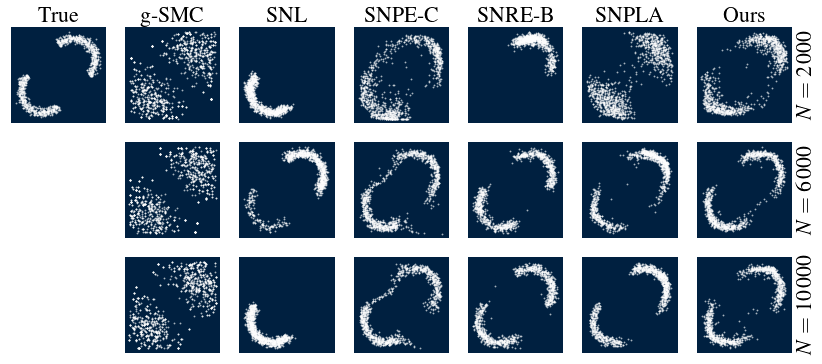

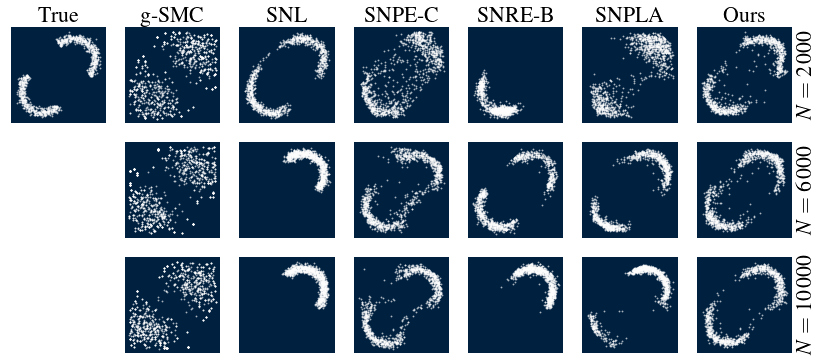

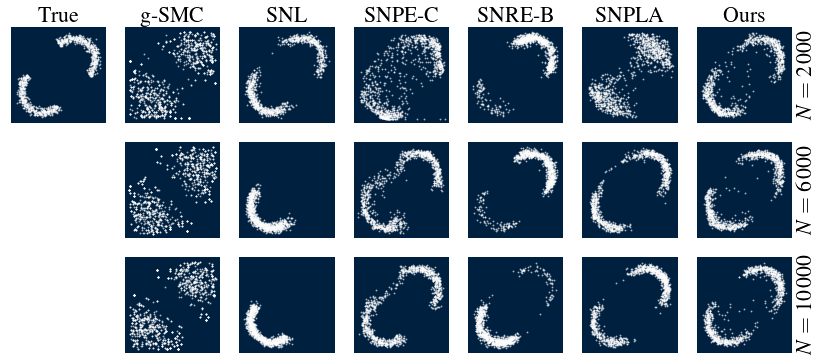

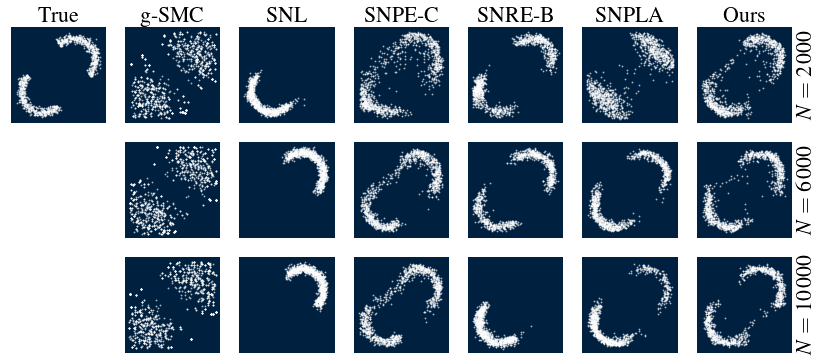

In [66]:
# plotting

import matplotlib.gridspec as gridspec
label_fontsize=22
scatter_kws = {'alpha': 0.5,
               'rasterized': True,
               's': 0.7,
               'color': (1, 1, 1, 0.64),
               'marker': 'D'}

def plot_twomoons_posterior(data_seed = 0, save_plot=False):

    fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(14, 6), sharex=True, sharey=True)
    fig.delaxes(axes[1][0])
    fig.delaxes(axes[2][0])
    
    axes[0][0].scatter(analytical_post[:,0],analytical_post[:,1], **scatter_kws)

    # round 2 --> 2k samples train
    axes[0][1].scatter(abc_smc_samples["post_samples"]["2000"][data_seed+1][:, 0],abc_smc_samples["post_samples"]["2000"][data_seed+1][:, 1], **scatter_kws)
    axes[0][2].scatter(snl_post[1][data_seed][:,0],snl_post[1][data_seed][:,1], **scatter_kws)
    axes[0][3].scatter(snpe_c_post[1][data_seed][:,0],snpe_c_post[1][data_seed][:,1], **scatter_kws)
    axes[0][4].scatter(snre_b_post[1][data_seed][:,0],snre_b_post[1][data_seed][:,1], **scatter_kws)
    axes[0][5].scatter(snpla_post[1][data_seed][:,0],snpla_post[1][data_seed][:,1], **scatter_kws)
    if "2000" in bayesflow_samples["post_samples"].keys(): axes[0][6].scatter(bayesflow_samples["post_samples"]["2000"][data_seed+1][:, 0],bayesflow_samples["post_samples"]["2000"][data_seed+1][:, 1], **scatter_kws)

    # round 6 --> 6k samples train
    axes[1][1].scatter(abc_smc_samples["post_samples"]["6000"][data_seed+1][:, 0],abc_smc_samples["post_samples"]["6000"][data_seed+1][:, 1], **scatter_kws)
    axes[1][2].scatter(snl_post[5][data_seed][:,0],snl_post[5][data_seed][:,1], **scatter_kws)
    axes[1][3].scatter(snpe_c_post[5][data_seed][:,0],snpe_c_post[5][data_seed][:,1], **scatter_kws)
    axes[1][4].scatter(snre_b_post[5][data_seed][:,0],snre_b_post[5][data_seed][:,1], **scatter_kws)
    axes[1][5].scatter(snpla_post[5][data_seed][:,0],snpla_post[5][data_seed][:,1], **scatter_kws)
    if "6000" in bayesflow_samples["post_samples"].keys(): axes[1][6].scatter(bayesflow_samples["post_samples"]["6000"][data_seed+1][:, 0],bayesflow_samples["post_samples"]["6000"][data_seed+1][:, 1], **scatter_kws)

    # last round --> 10k samples train
    axes[2][1].scatter(abc_smc_samples["post_samples"]["10000"][data_seed+1][:, 0],abc_smc_samples["post_samples"]["10000"][data_seed+1][:, 1], **scatter_kws)    
    axes[2][2].scatter(snl_post[-1][data_seed][:,0],snl_post[-1][data_seed][:,1], **scatter_kws)
    axes[2][3].scatter(snpe_c_post[-1][data_seed][:,0],snpe_c_post[-1][data_seed][:,1], **scatter_kws)
    axes[2][4].scatter(snre_b_post[-1][data_seed][:,0],snre_b_post[-1][data_seed][:,1], **scatter_kws)
    axes[2][5].scatter(snpla_post[-1][data_seed][:,0],snpla_post[-1][data_seed][:,1], **scatter_kws)
    if "10000" in bayesflow_samples["post_samples"].keys(): axes[2][6].scatter(bayesflow_samples["post_samples"]["10000"][data_seed+1][:, 0],bayesflow_samples["post_samples"]["10000"][data_seed+1][:, 1], **scatter_kws)

    for ax in axes.flatten():
        ax.grid(False)
        ax.set_facecolor((0/255, 32/255, 64/255, 1.0))
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        ax.spines['bottom'].set_alpha(0.0)
        ax.spines['top'].set_alpha(0.0)
        ax.spines['right'].set_alpha(0.0)
        ax.spines['left'].set_alpha(0.0)

    axes[0][0].set_title("True",fontsize=label_fontsize)
    axes[0][1].set_title("g-SMC",fontsize=label_fontsize)
    axes[0][2].set_title("SNL",fontsize=label_fontsize)
    axes[0][3].set_title("SNPE-C",fontsize=label_fontsize)
    axes[0][4].set_title("SNRE-B",fontsize=label_fontsize)
    axes[0][5].set_title("SNPLA",fontsize=label_fontsize)
    axes[0][6].set_title("Ours",fontsize=label_fontsize)

    axes[0][6].set_ylabel(r'$N = 2\,000$',fontsize=label_fontsize)
    axes[0][6].yaxis.set_label_position("right")

    axes[1][6].set_ylabel(r'$N = 6\,000$',fontsize=label_fontsize)
    axes[1][6].yaxis.set_label_position("right")

    axes[2][6].set_ylabel(r'$N = 10\,000$',fontsize=label_fontsize)
    axes[2][6].yaxis.set_label_position("right")


    if save_plot:
        plt.savefig("plots/tm_posterior_" + str(data_seed) + ".pdf", 
                    bbox_inches="tight")
        
for data_seed in range(10):
    plot_twomoons_posterior(data_seed = data_seed, save_plot=True)

### MMD post pred

In [24]:
from functools import partial
import tensorflow as tf
import numpy as np


def maximum_mean_discrepancy(source_samples, target_samples, kernel = "gaussian", 
minimum=0., unbiased=False, squared=True):
    """ This Maximum Mean Discrepancy (MMD) loss is calculated with a number of different Gaussian or Inverse-Multiquadratic kernels.
    """

    sigmas = [
        1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 5, 10, 15, 20, 25, 30, 35, 100,
        1e3, 1e4, 1e5, 1e6
    ]
    
    if kernel == "gaussian":
        kernel = partial(_gaussian_kernel_matrix, sigmas=sigmas)
    elif kernel == "inverse_multiquadratic":
        kernel = partial(_inverse_multiquadratic_kernel_matrix, sigmas=sigmas)
    else:
        print("Invalid kernel specified. Falling back to default Gaussian.")
        kernel = partial(_gaussian_kernel_matrix, sigmas=sigmas)
    
    if unbiased:
        loss_value = _mmd_kernel_unbiased(source_samples, target_samples, kernel=kernel)
    else:
        loss_value = _mmd_kernel(source_samples, target_samples, kernel=kernel)
        
        
    loss_value = tf.maximum(minimum, loss_value) 
    
    if squared:
        return loss_value
    else:
        return tf.math.sqrt(loss_value)
    
def _gaussian_kernel_matrix(x, y, sigmas):
    """ Computes a Gaussian Radial Basis Kernel between the samples of x and y.
    We create a sum of multiple gaussian kernels each having a width :math:`\sigma_i`.
    Parameters
    ----------
    x :  tf.Tensor of shape (M, num_features)
    y :  tf.Tensor of shape (N, num_features)
    sigmas : list(float)
        List which denotes the widths of each of the gaussians in the kernel.
    Returns
    -------
    kernel: tf.Tensor
        RBF kernel of shape [num_samples{x}, num_samples{y}]
    """

    norm = lambda v: tf.math.reduce_sum(tf.square(v), 1)
    beta = 1. / (2. * (tf.expand_dims(sigmas, 1)))
    dist = tf.transpose(norm(tf.expand_dims(x, 2) - tf.transpose(y)))
    s = tf.matmul(beta, tf.reshape(dist, (1, -1)))
    kernel = tf.reshape(tf.math.reduce_sum(tf.exp(-s), 0), tf.shape(dist))
    return 

def _mmd_kernel(x, y, kernel=None):
    """ Computes the Maximum Mean Discrepancy (MMD) of two samples: x and y.
    Maximum Mean Discrepancy (MMD) is a distance-measure between the samples of the distributions of x and y.
    Parameters
    ----------
    x      : tf.Tensor of shape (num_samples, num_features)
    y      : tf.Tensor of shape (num_samples, num_features)
    kernel : callable, default: _gaussian_kernel_matrix
        A function which computes the kernel in MMD.
    Returns
    -------
    loss : tf.Tensor
        squared maximum mean discrepancy loss, shape (,)
    """

    loss = tf.math.reduce_mean(kernel(x, x))  
    loss += tf.math.reduce_mean(kernel(y, y))  
    loss -= 2 * tf.math.reduce_mean(kernel(x, y))
    return loss

def _inverse_multiquadratic_kernel_matrix(x, y, sigmas):
    """ Computes an inverse multiquadratic RBF between the samples of x and y.
    We create a sum of multiple IM-RBF kernels each having a width :math:`\sigma_i`.
    Parameters
    ----------
    x :  tf.Tensor of shape (M, num_features)
    y :  tf.Tensor of shape (N, num_features)
    sigmas : list(float)
        List which denotes the widths of each of the gaussians in the kernel.
    Returns
    -------
    kernel: tf.Tensor
        RBF kernel of shape [num_samples{x}, num_samples{y}]
    """
    
    dist = tf.expand_dims(tf.reduce_sum((x[:, None, :] - y[None, :, :]) ** 2, axis=-1), axis=-1)
    sigmas = tf.expand_dims(sigmas, 0)
    return tf.reduce_sum(sigmas / (dist + sigmas), axis=-1)

## Posterior MMD

In [60]:
def plot_posterior_predictive_boxplot(n_samples):
    snl_post_pred_mmd = np.zeros((seed_max))
    snpla_post_pred_mmd = np.zeros((seed_max))
    bayesflow_post_pred_mmd = np.zeros((seed_max))
    
    if n_samples == 2000:
        snl_idx = 1
        snpla_idx = 1
        bayesflow_key = "2000"
    elif n_samples == 6000:
        snl_idx = 5
        snpla_idx = 5
        bayesflow_key = "6000"
    elif n_samples == 10000:
        snl_idx = 9
        snpla_idx = 9
        bayesflow_key = "10000"
    
    for j in range(seed_max):
        # assert 1k in-prior samples 
        assert bayesflow_samples["lik_samples"][bayesflow_key][j+1].shape[0] == 1000
        
        snl_post_pred_mmd[j]       = float(maximum_mean_discrepancy(analytical_post_pred.astype("float32"), snl_post_pred[snl_idx][j].astype("float32"), kernel="inverse_multiquadratic", squared=False))
        snpla_post_pred_mmd[j]     = float(maximum_mean_discrepancy(analytical_post_pred.astype("float32"), snpla_post_pred[snpla_idx][j].astype("float32"), kernel="inverse_multiquadratic", squared=False)) 
        bayesflow_post_pred_mmd[j] = float(maximum_mean_discrepancy(analytical_post_pred.astype("float32"), bayesflow_samples["lik_samples"][bayesflow_key][j+1].astype("float32"), kernel="inverse_multiquadratic", squared=False))
    
    print(f"SNL Mean (SD) = {np.mean(snl_post_pred_mmd).round(3)} ({np.std(snl_post_pred_mmd).round(3)})")
    print(f"SNPLA Mean (SD) = {np.mean(snpla_post_pred_mmd).round(3)} ({np.std(snpla_post_pred_mmd).round(3)})")
    print(f"BayesFlow Mean (SD) = {np.mean(bayesflow_post_pred_mmd).round(3)} ({np.std(bayesflow_post_pred_mmd).round(3)})")
    
    post_pred_mmd_df = pd.DataFrame({'SNL': snl_post_pred_mmd, 'SNPLA': snpla_post_pred_mmd, 'JANA': bayesflow_post_pred_mmd })
    fig, ax = plt.subplots(figsize=(4, 4))

    ax.set_yticks(np.arange(0, 0.21, 0.05), minor=False)
    ax.set_yticks(np.arange(0, 0.21, 0.01), minor=True)
    ax.grid(axis='y', which="major", alpha=0.6)
    ax.grid(axis="y", which="minor", alpha=0.15)
    ax.set_ylim(0.10, 0.21)

    sns.boxplot(data=post_pred_mmd_df, 
                ax=ax, width=0.6,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (0.53, 0, 0, 0.30)},
                linewidth=2
               )

    ax.tick_params(axis="both", which="both", labelsize=24)
    sns.despine()
    # plt.title("[elu activation] Posterior Predictive: MMD to Analytic (lower is better)")

    plt.savefig(f"plots/tm_boxplot_posterior_predictive_{n_samples}.pdf", bbox_inches='tight')  

SNL Mean (SD) = 0.127 (0.01)
SNPLA Mean (SD) = 0.173 (0.007)
BayesFlow Mean (SD) = 0.158 (0.017)


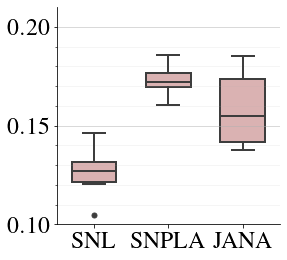

In [61]:
plot_posterior_predictive_boxplot(n_samples=2000)

SNL Mean (SD) = 0.123 (0.007)
SNPLA Mean (SD) = 0.122 (0.01)
BayesFlow Mean (SD) = 0.137 (0.011)


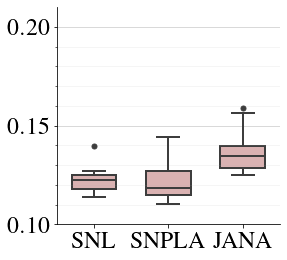

In [62]:
plot_posterior_predictive_boxplot(n_samples=6000)

SNL Mean (SD) = 0.119 (0.008)
SNPLA Mean (SD) = 0.121 (0.008)
BayesFlow Mean (SD) = 0.137 (0.01)


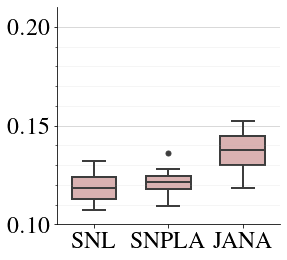

In [63]:
plot_posterior_predictive_boxplot(n_samples=10000)

In [58]:
def plot_posterior_boxplot(n_samples):
    snl_post_mmd = np.zeros((seed_max))
    snpla_post_mmd = np.zeros((seed_max))
    snpe_c_post_mmd = np.zeros((seed_max))
    snre_b_post_mmd = np.zeros((seed_max))
    bayesflow_post_mmd = np.zeros((seed_max))
    gsmc_post_mmd = np.zeros((seed_max))
    
    if n_samples == 2000:
        snl_idx = 1
        snpla_idx = 1
        snpec_idx = 1
        snreb_idx = 1
        bayesflow_key = "2000"
        gsmc_key = "2000"
    elif n_samples == 6000:
        snl_idx = 5
        snpla_idx = 5
        snpec_idx = 5
        snreb_idx = 5
        bayesflow_key = "6000"
        gsmc_key = "6000"
    elif n_samples == 10000:
        snl_idx = 9
        snpla_idx = 9
        snpec_idx = 9
        snreb_idx = 9
        bayesflow_key = "10000"
        gsmc_key = "10000"
    
    for j in range(seed_max):
        # assert 1k in-prior samples 
        assert bayesflow_samples["post_samples"][bayesflow_key][j+1].shape[0] == 1000
        
        snl_post_mmd[j]       = float(maximum_mean_discrepancy(analytical_post.astype("float32"), snl_post[snl_idx][j].astype("float32"), kernel="inverse_multiquadratic", squared=False))
        snpla_post_mmd[j]     = float(maximum_mean_discrepancy(analytical_post.astype("float32"), snpla_post[snpla_idx][j].astype("float32"), kernel="inverse_multiquadratic", squared=False)) 
        snpe_c_post_mmd[j]    = float(maximum_mean_discrepancy(analytical_post.astype("float32"), snpe_c_post[snpec_idx][j].astype("float32"), kernel="inverse_multiquadratic", squared=False)) 
        snre_b_post_mmd[j]    = float(maximum_mean_discrepancy(analytical_post.astype("float32"), snre_b_post[snreb_idx][j].astype("float32"), kernel="inverse_multiquadratic", squared=False)) 
        bayesflow_post_mmd[j] = float(maximum_mean_discrepancy(analytical_post.astype("float32"), bayesflow_samples["post_samples"][bayesflow_key][j+1].astype("float32"), kernel="inverse_multiquadratic", squared=False))
        gsmc_post_mmd[j] = float(maximum_mean_discrepancy(analytical_post.astype("float32"), abc_smc_samples["post_samples"][gsmc_key][j+1].astype("float32"), kernel="inverse_multiquadratic", squared=False))
        

    print(f"SNPE-C Mean (SD) = {np.mean(snpe_c_post_mmd).round(3)} ({np.std(snpe_c_post_mmd).round(3)})")
    print(f"SNRE-B Mean (SD) = {np.mean(snre_b_post_mmd).round(3)} ({np.std(snre_b_post_mmd).round(3)})")
    print(f"SNL Mean (SD) = {np.mean(snl_post_mmd).round(3)} ({np.std(snl_post_mmd).round(3)})")
    print(f"SNPLA Mean (SD) = {np.mean(snpla_post_mmd).round(3)} ({np.std(snpla_post_mmd).round(3)})")
    print(f"JANA Mean (SD) = {np.mean(bayesflow_post_mmd).round(3)} ({np.std(bayesflow_post_mmd).round(3)})")
    print(f"g-SMC Mean (SD) = {np.mean(gsmc_post_mmd).round(3)} ({np.std(gsmc_post_mmd).round(3)})")

    
        
    post_mmd_df = pd.DataFrame({
        "g-SMC": gsmc_post_mmd,
        'SNPE-C': snpe_c_post_mmd,
        'SNRE-B': snre_b_post_mmd,
        'SNL': snl_post_mmd, 
        'SNPLA': snpla_post_mmd, 
        'JANA': bayesflow_post_mmd,
    })
    
    fig, ax = plt.subplots(figsize=(10,4))
    ax.set_yticks(np.arange(0, 2, 0.5), minor=False)
    ax.set_yticks(np.arange(0, 2, 0.1), minor=True)
    ax.grid(axis='y', which="major", alpha=0.6)
    ax.grid(axis="y", which="minor", alpha=0.15)

    sns.boxplot(data=post_mmd_df, 
                ax=ax, width=0.6,
                flierprops={"marker": "o"},
                boxprops={"facecolor": (0.0, 0, 0.53, 0.3)},
                linewidth=2
               )

    ax.tick_params(axis="both", which="both", labelsize=24)
    sns.despine()
    plt.ylim(0, 1.5)
    # plt.title("[elu activation] Posterior: MMD to Analytic (lower is better)")
    plt.savefig(f"plots/tm_boxplot_posterior_{n_samples}.pdf", bbox_inches='tight')
    

SNPE-C Mean (SD) = 0.304 (0.076)
SNRE-B Mean (SD) = 0.992 (0.38)
SNL Mean (SD) = 0.84 (0.462)
SNPLA Mean (SD) = 0.315 (0.023)
JANA Mean (SD) = 0.189 (0.021)
g-SMC Mean (SD) = 0.327 (0.021)


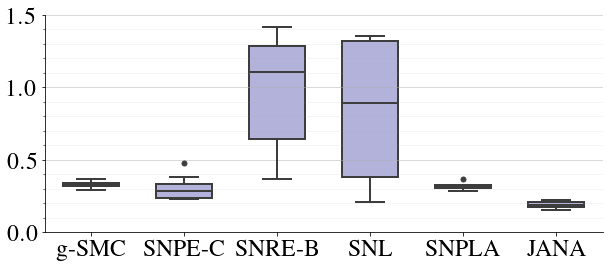

In [59]:
plot_posterior_boxplot(n_samples=2000)

SNPE-C Mean (SD) = 0.226 (0.043)
SNRE-B Mean (SD) = 0.704 (0.499)
SNL Mean (SD) = 1.075 (0.309)
SNPLA Mean (SD) = 0.273 (0.115)
JANA Mean (SD) = 0.163 (0.019)
g-SMC Mean (SD) = 0.321 (0.017)


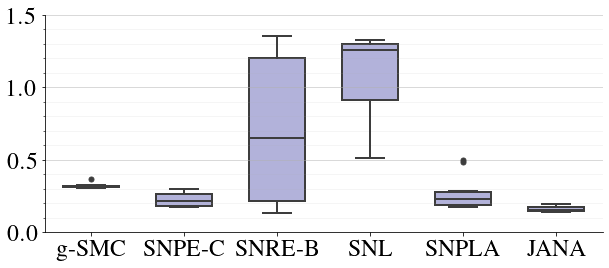

In [64]:
plot_posterior_boxplot(n_samples=6000)

SNPE-C Mean (SD) = 0.207 (0.051)
SNRE-B Mean (SD) = 0.923 (0.445)
SNL Mean (SD) = 1.171 (0.34)
SNPLA Mean (SD) = 0.41 (0.248)
JANA Mean (SD) = 0.157 (0.012)
g-SMC Mean (SD) = 0.317 (0.015)


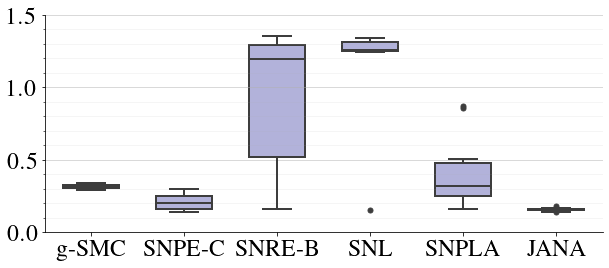

In [65]:
plot_posterior_boxplot(n_samples=10000)